# Central Limit Theorem (CLT)

## Objetivo

1. Entender o funcionamento do [Teorema Central do Limite](https://pt.wikipedia.org/wiki/Teorema_central_do_limite) na prática.

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
plt.style.use('seaborn-whitegrid')

## O teorema

Para uma determinada população, meça uma característica de cada individuo (peso, altura, renda, idade, tamanho etc.).



O CLT diz afirma que quando o tamanho da amostra aumenta, a distribuição amostral da sua média aproxima-se cada vez mais de uma distribuição normal. Este resultado é fundamental na teoria da inferência estatística.

É importante observar que o CLT é válido **qualquer que seja a distribuição inicial dos dados!**


![clt](../images/640px-IllustrationCentralTheorem.png)

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Seja uma amostra aleatória ($x_1, x_2, \cdots, x_n$) de uma variável aleatória $X$ com qualquer distribuição, média $\mu$ e desvio padrão $\sigma$. 

A medida que $n$ cresce, a distribuição de probabilidade da média amostral, $\overline{X}$, se aproxima de uma Normal com média $\mu$ e desvio padrão $\frac{\sigma}{\sqrt{n}}$. Isto é $\overline{X} \sim N (\mu, \sigma^2/n)$.

Se a transformação a baixo for realizada, então $Z \sim N (0,1)$.

$$Z = \frac{\overline{X} -\mu}{\sigma/\sqrt{n}} $$


O **Teorema Central do Limite** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. 

Este fato é assegurado para $n$ maior ou igual a 30.

$$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**

# Valores de referência

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset('tips')

1. Calcule a média (mu) e o desvio padrão (sigma) das gorjetas do dataset `tips`. 

In [5]:
mu=df['tip'].mean()
sigma=df['tip'].std()
print(mu,sigma)

2.9982786885245902 1.3836381890011826


2. Faça o histograma das gorjetas. Ele parece uma curva normal?

<AxesSubplot:xlabel='tip', ylabel='Count'>

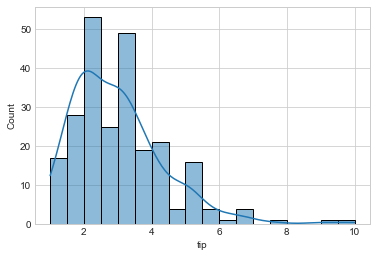

In [6]:
sns.histplot(data=df,x='tip',kde=True)

# Amostragem

## Sem repetição

1. Selecione aleatóriamente e **sem repetição** 10 linhas do dataset e calcule a média da amostra $\bar{x}$.

In [7]:
df['tip'].sample(n=10,replace=False).mean()

3.2630000000000003

## Com repetição

1. Selecione aleatóriamente e **com reposição** 1000 linhas do dataset e calcule a média da amostra $\bar{x}$.

In [8]:
df['tip'].sample(n=1000,replace=True).mean()

3.018060000000001

2. Quantas linhas temos no dataset?

In [9]:
df.shape

(244, 7)

# Média das médias

Crie uma lista `means` que armazene as médias de $N$ amostras de tamanho amostral $n$.

Começe com $N = 10$ amostras de tamanho $n = 5$.

1. Na mesma célula, faça um gráfico da distribuição de `means`. 
1. Mantenha $n$ constante e aumente $N$. O que você observa?
1. Mantenha $N$ constante e aumente $n$. O que você observa?

<AxesSubplot:ylabel='Count'>

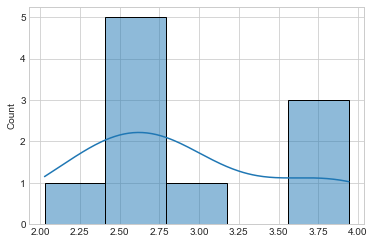

In [10]:
N=10 # amostras
n=5 # tamanho amostral

means=[df['tip'].sample(n=n,replace=True).mean() for i in range(N)]
sns.histplot(means,kde=True)

<AxesSubplot:ylabel='Count'>

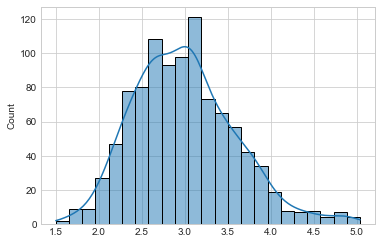

In [11]:
N=1000 # amostras
n=5 # tamanho amostral

means=[df['tip'].sample(n=n,replace=True).mean() for i in range(N)]
sns.histplot(means,kde=True)

<AxesSubplot:ylabel='Count'>

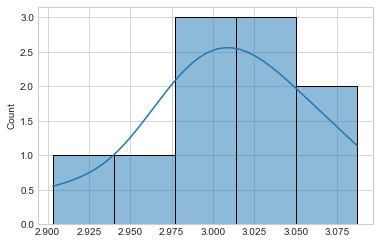

In [12]:
N=10 # amostras
n=1000 # tamanho amostral

means=[df['tip'].sample(n=n,replace=True).mean() for i in range(N)]
sns.histplot(means,kde=True)

<AxesSubplot:ylabel='Count'>

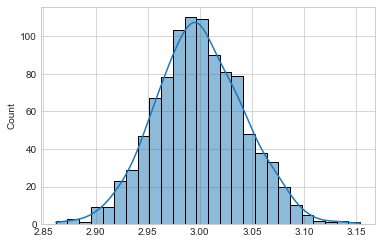

In [13]:
N=1000 # amostras
n=1000 # tamanho amostral

means=[df['tip'].sample(n=n,replace=True).mean() for i in range(N)]
sns.histplot(means,kde=True)

# CLT na prática

1. Faça uma grade com 6 distribuições para  $ n \in \{ 1, 5, 50, 100, 500, 1000 \}$.

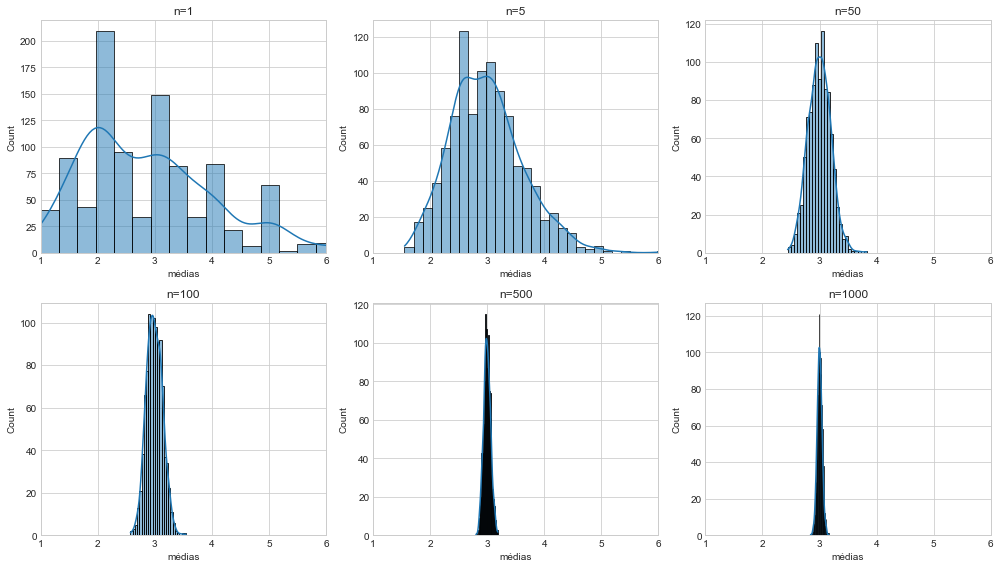

In [14]:
N=1000 # amostras
n_list=[1,5,50,100,500,1000] # tamanho amostral

fig,axes=plt.subplots(2,3,figsize=(14,8))

for n,ax in zip(n_list, axes.flat):
    means=[df['tip'].sample(n=n,replace=True).mean() for i in range(N)]
    sns.histplot(means,kde=True,ax=ax)
    ax.set_title(f'n={n}')
    ax.set_xlim(1,6)
    ax.set_xlabel('médias')
plt.tight_layout()

# Verificando o CLT

Vamos verificar o Teorema do Limite Central computacionalmente:

Para cada valor de $n$:
- Compare `mu` com a média das médias $\bar{x}$;
- Compare `sigma` com o desvio padrão das médias (não esqueça o fator $\sqrt{n}$).

In [15]:
N=100 # amostras
n_list=[1,5,50,100,500,1000] # tamanho amostral



for n in n_list:
    means=[df['tip'].sample(n=n,replace=True).mean() for i in range(N)]
    x_bar=np.mean(means) #media das medias
    sigma_bar=np.std(means)
    erro_medias=round(abs(mu-x_bar),4)
    erro_sigma=round(abs(sigma-sigma_bar),4)/np.sqrt(n)
    print(f'n = {n:4}, {erro_medias:5.4f},{erro_sigma:5.4f}')

n =    1, 0.1942,0.0906
n =    5, 0.0505,0.3176
n =   50, 0.0053,0.1664
n =  100, 0.0002,0.1241
n =  500, 0.0057,0.0589
n = 1000, 0.0006,0.0424


# Exemplo

Imagine que você seja um garçon e que em determinado período tenha sido designado pelo gerente para atender 100 mesas. O valor médio da conta de suas mesas deu R$ 18,00 (`target`). Qual a chance disso acontecer?

Vamos supor que coletemos uma amostra de 100 contas da nossa população global com $\mu$ and $\sigma$ 
e que o valor médio das contas $\mu_x$ seja R$ 18,00.

Como seria o formato da distribuição das médias se nós repetissemos o processo de amostragem diversas vezes? Pense na forma, média e desvio padrão.

1. Faça um gráfico da distribuição da média das contas de 100 mesas aleatórias. Use stats.norm pra facilitar!
1. Acrescente um ponto com a média das suas 100 mesas. O que vc pode concluir?

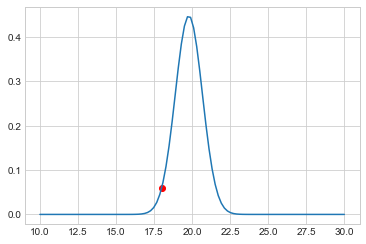

In [16]:
mu = df['total_bill'].mean()
sigma = df['total_bill'].std()

n=100
target=18
x=np.linspace(10,30,100)

y=stats.norm.pdf(x,loc=mu,scale=(sigma/np.sqrt(n)))
plt.plot(x,y)
plt.scatter(target,stats.norm.pdf(target,loc=mu,scale=(sigma/np.sqrt(n))),c='r')

Nos vemos claramente que tal cenário é improvável. Vamos calcular a probabilidade.

In [17]:
stats.norm.cdf(target,loc=mu,scale=(sigma/np.sqrt(n)))

0.022421007000834076

## Calcule usando o z-teste

$$z={x-\mu  \over \sigma }$$

1. Calcule Z para o valor de R$ 18,00. 

In [18]:
z=(target-mu)/sigma
z

-0.20061334299144332

Faça um gráfico da distribuição normal (0, 1) e inclua um ponto vermelho para o target (use a funcão `pdf`).

**Conclusão:** 

# Mais inforações

- [StatQuest - Probability vs Likelihood](https://www.youtube.com/watch?v=pYxNSUDSFH4)
- [StatQuest - Central Limit Theorem](https://www.youtube.com/watch?v=YAlJCEDH2uY)
- [3blue1brown - Bayes Theorem](https://www.youtube.com/watch?v=HZGCoVF3YvM)